In [57]:
import matplotlib.pyplot as plt
import pandas as pd
from apyori import apriori
import codecs
import utils

In [58]:
doc = codecs.open('diagnosis.data','rU','UTF-16') #open for reading with "universal" type set
df = pd.read_csv(doc, sep='\t', names=['Temperature', 
                          'Occurrence of nausea', 
                          'Lumbar pain', 
                          'Urine pushing', 
                          'Micturition pains', 
                          'Burning of urethra', 
                          'Inflammation of urinary bladder', 
                          'Nephritis of renal pelvis origin'
                         ]
                 , header=None)
df.head()

,Temperature,Occurrence of nausea,Lumbar pain,Urine pushing,Micturition pains,Burning of urethra,Inflammation of urinary bladder,Nephritis of renal pelvis origin
0,"35,5",no,yes,no,no,no,no,no
1,"35,9",no,no,yes,yes,yes,yes,no
2,"35,9",no,yes,no,no,no,no,no
3,"36,0",no,no,yes,yes,yes,yes,no
4,"36,0",no,yes,no,no,no,no,no


In [59]:
df['Temperature'] = df['Temperature'].str.replace(',','.')
df

,Temperature,Occurrence of nausea,Lumbar pain,Urine pushing,Micturition pains,Burning of urethra,Inflammation of urinary bladder,Nephritis of renal pelvis origin
0,35.5,no,yes,no,no,no,no,no
1,35.9,no,no,yes,yes,yes,yes,no
2,35.9,no,yes,no,no,no,no,no
3,36.0,no,no,yes,yes,yes,yes,no
4,36.0,no,yes,no,no,no,no,no
...,...,...,...,...,...,...,...,...
115,41.4,no,yes,yes,no,yes,no,yes
116,41.5,no,no,no,no,no,no,no
117,41.5,yes,yes,no,yes,no,no,yes
118,41.5,no,yes,yes,no,yes,no,yes


In [60]:
df['Temperature'] = df['Temperature'].astype(float)
print(df.dtypes)

Temperature                         float64
Occurrence of nausea                 object
Lumbar pain                          object
Urine pushing                        object
Micturition pains                    object
Burning of urethra                   object
Inflammation of urinary bladder      object
Nephritis of renal pelvis origin     object
dtype: object


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 8 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Temperature                       120 non-null    float64
 1   Occurrence of nausea              120 non-null    object 
 2   Lumbar pain                       120 non-null    object 
 3   Urine pushing                     120 non-null    object 
 4   Micturition pains                 120 non-null    object 
 5   Burning of urethra                120 non-null    object 
 6   Inflammation of urinary bladder   120 non-null    object 
 7   Nephritis of renal pelvis origin  120 non-null    object 
dtypes: float64(1), object(7)
memory usage: 7.6+ KB


In [62]:
df.describe(include='all')

,Temperature,Occurrence of nausea,Lumbar pain,Urine pushing,Micturition pains,Burning of urethra,Inflammation of urinary bladder,Nephritis of renal pelvis origin
count,120.000000,120,120,120,120,120,120,120
unique,NaN,2,2,2,2,2,2,2
top,NaN,no,yes,yes,no,no,no,no
freq,NaN,91,70,80,61,70,61,70
mean,38.724167,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,1.819132,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,35.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,37.100000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,37.950000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,40.600000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [63]:
df.drop(['Temperature'], axis=1, inplace=True)
df  

,Occurrence of nausea,Lumbar pain,Urine pushing,Micturition pains,Burning of urethra,Inflammation of urinary bladder,Nephritis of renal pelvis origin
0,no,yes,no,no,no,no,no
1,no,no,yes,yes,yes,yes,no
2,no,yes,no,no,no,no,no
3,no,no,yes,yes,yes,yes,no
4,no,yes,no,no,no,no,no
...,...,...,...,...,...,...,...
115,no,yes,yes,no,yes,no,yes
116,no,no,no,no,no,no,no
117,yes,yes,no,yes,no,no,yes
118,no,yes,yes,no,yes,no,yes


In [64]:
df['Occurrence of nausea'] = df['Occurrence of nausea'].str.title()
df['Lumbar pain'] = df['Lumbar pain'].str.title()
df['Urine pushing'] = df['Urine pushing'].str.title()
df['Micturition pains'] = df['Micturition pains'].str.title()
df['Burning of urethra'] = df['Burning of urethra'].str.title()
df['Inflammation of urinary bladder'] = df['Inflammation of urinary bladder'].str.title()
df['Nephritis of renal pelvis origin'] = df['Nephritis of renal pelvis origin'].str.title()
df

,Occurrence of nausea,Lumbar pain,Urine pushing,Micturition pains,Burning of urethra,Inflammation of urinary bladder,Nephritis of renal pelvis origin
0,No,Yes,No,No,No,No,No
1,No,No,Yes,Yes,Yes,Yes,No
2,No,Yes,No,No,No,No,No
3,No,No,Yes,Yes,Yes,Yes,No
4,No,Yes,No,No,No,No,No
...,...,...,...,...,...,...,...
115,No,Yes,Yes,No,Yes,No,Yes
116,No,No,No,No,No,No,No
117,Yes,Yes,No,Yes,No,No,Yes
118,No,Yes,Yes,No,Yes,No,Yes


In [65]:
df.describe()

,Occurrence of nausea,Lumbar pain,Urine pushing,Micturition pains,Burning of urethra,Inflammation of urinary bladder,Nephritis of renal pelvis origin
count,120,120,120,120,120,120,120
unique,2,2,2,2,2,2,2
top,No,Yes,Yes,No,No,No,No
freq,91,70,80,61,70,61,70


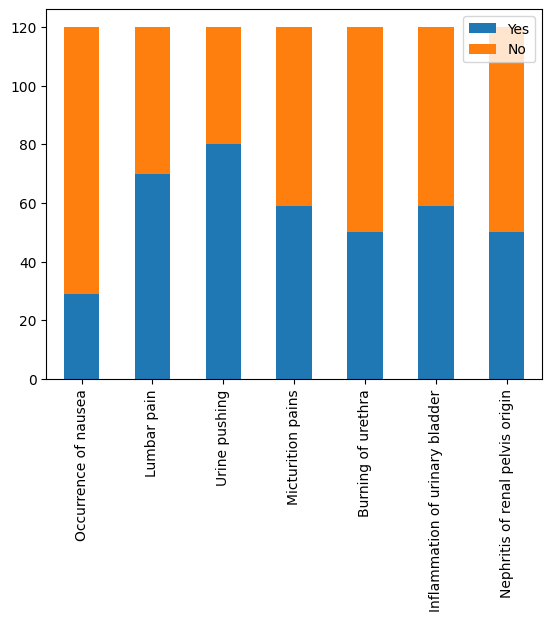

In [66]:
yes = (df == 'Yes').sum()
no = (df == 'No').sum()
myplot = pd.concat([yes,no], axis=1,keys=['Yes','No'])
ax=myplot.plot.bar(stacked=True)
plt.show()

In [67]:
df1 = df[df['Inflammation of urinary bladder'] == 'Yes']
df1.head()

,Occurrence of nausea,Lumbar pain,Urine pushing,Micturition pains,Burning of urethra,Inflammation of urinary bladder,Nephritis of renal pelvis origin
1,No,No,Yes,Yes,Yes,Yes,No
3,No,No,Yes,Yes,Yes,Yes,No
6,No,No,Yes,Yes,Yes,Yes,No
8,No,No,Yes,Yes,Yes,Yes,No
9,No,No,Yes,Yes,Yes,Yes,No


In [68]:
df2 = df[df['Nephritis of renal pelvis origin'] == 'Yes']
df2.head()

,Occurrence of nausea,Lumbar pain,Urine pushing,Micturition pains,Burning of urethra,Inflammation of urinary bladder,Nephritis of renal pelvis origin
60,No,Yes,Yes,No,Yes,No,Yes
61,No,Yes,Yes,No,Yes,No,Yes
62,No,Yes,Yes,No,Yes,No,Yes
63,No,Yes,Yes,No,Yes,No,Yes
64,No,Yes,Yes,No,Yes,No,Yes


In [69]:
df1 = df1.drop(['Inflammation of urinary bladder', 'Nephritis of renal pelvis origin'], axis=1)
df1.head()

,Occurrence of nausea,Lumbar pain,Urine pushing,Micturition pains,Burning of urethra
1,No,No,Yes,Yes,Yes
3,No,No,Yes,Yes,Yes
6,No,No,Yes,Yes,Yes
8,No,No,Yes,Yes,Yes
9,No,No,Yes,Yes,Yes


In [70]:
df2 = df2.drop(['Inflammation of urinary bladder', 'Nephritis of renal pelvis origin'], axis=1)
df2.head()

,Occurrence of nausea,Lumbar pain,Urine pushing,Micturition pains,Burning of urethra
60,No,Yes,Yes,No,Yes
61,No,Yes,Yes,No,Yes
62,No,Yes,Yes,No,Yes
63,No,Yes,Yes,No,Yes
64,No,Yes,Yes,No,Yes


## Part A : Inflammation of urinary bladder

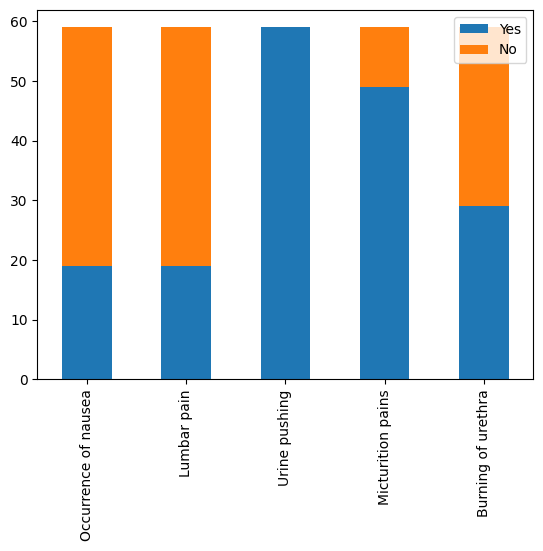

In [71]:
#Inflammation of urinary bladder
yes1 = (df1 == 'Yes').sum()
no1 = (df1 == 'No').sum()
myplot1 = pd.concat([yes1,no1], axis=1,keys=['Yes','No'])
ax=myplot1.plot.bar(stacked=True)
plt.show()

In [73]:
Inflammation_of_urinary_bladder = utils.data_prepare(df1)
Inflammation_of_urinary_bladder

[['Urine pushing', 'Micturition pains', 'Burning of urethra'],
 ['Urine pushing', 'Micturition pains', 'Burning of urethra'],
 ['Urine pushing', 'Micturition pains', 'Burning of urethra'],
 ['Urine pushing', 'Micturition pains', 'Burning of urethra'],
 ['Urine pushing', 'Micturition pains', 'Burning of urethra'],
 ['Urine pushing', 'Micturition pains', 'Burning of urethra'],
 ['Urine pushing', 'Micturition pains', 'Burning of urethra'],
 ['Urine pushing', 'Micturition pains', 'Burning of urethra'],
 ['Urine pushing', 'Micturition pains', 'Burning of urethra'],
 ['Urine pushing', 'Micturition pains', 'Burning of urethra'],
 ['Urine pushing', 'Micturition pains'],
 ['Urine pushing', 'Micturition pains'],
 ['Urine pushing', 'Micturition pains', 'Burning of urethra'],
 ['Urine pushing', 'Micturition pains', 'Burning of urethra'],
 ['Urine pushing', 'Micturition pains', 'Burning of urethra'],
 ['Urine pushing', 'Micturition pains', 'Burning of urethra'],
 ['Urine pushing'],
 ['Urine pushing

In [74]:
Rules_A = list(apriori(Inflammation_of_urinary_bladder, min_support=0.2, min_confidence=0.5))

In [75]:
associationRules_A = utils.extract(Rules_A)
rules_df1 = pd.DataFrame(associationRules_A, columns=['LHS', 'RHS', 'Support', 'Confidence', 'Lift'])
len(rules_df1)

46

In [76]:
utils.inspect(associationRules_A)

The number of associated rules: 46
LHS: [] --> RHS:['Micturition pains'], support: 0.83, confidence: 0.83, lift: 1.00
--------------------------------------------------------------------------------
LHS: [] --> RHS:['Urine pushing'], support: 1.00, confidence: 1.00, lift: 1.00
--------------------------------------------------------------------------------
LHS: ['Burning of urethra'] --> RHS:['Micturition pains'], support: 0.49, confidence: 1.00, lift: 1.20
--------------------------------------------------------------------------------
LHS: ['Micturition pains'] --> RHS:['Burning of urethra'], support: 0.49, confidence: 0.59, lift: 1.20
--------------------------------------------------------------------------------
LHS: ['Burning of urethra'] --> RHS:['Urine pushing'], support: 0.49, confidence: 1.00, lift: 1.00
--------------------------------------------------------------------------------
LHS: ['Lumbar pain'] --> RHS:['Micturition pains'], support: 0.32, confidence: 1.00, lift: 1.

In [77]:
rules_df1.nlargest(10, 'Lift')

,LHS,RHS,Support,Confidence,Lift
6,[Lumbar pain],[Occurrence of nausea],0.322034,1.0,3.105263
7,[Occurrence of nausea],[Lumbar pain],0.322034,1.0,3.105263
19,[Lumbar pain],"[Micturition pains, Occurrence of nausea]",0.322034,1.0,3.105263
20,[Occurrence of nausea],"[Micturition pains, Lumbar pain]",0.322034,1.0,3.105263
21,"[Micturition pains, Lumbar pain]",[Occurrence of nausea],0.322034,1.0,3.105263
23,"[Micturition pains, Occurrence of nausea]",[Lumbar pain],0.322034,1.0,3.105263
27,[Lumbar pain],"[Occurrence of nausea, Urine pushing]",0.322034,1.0,3.105263
28,[Occurrence of nausea],"[Lumbar pain, Urine pushing]",0.322034,1.0,3.105263
30,"[Lumbar pain, Urine pushing]",[Occurrence of nausea],0.322034,1.0,3.105263
31,"[Occurrence of nausea, Urine pushing]",[Lumbar pain],0.322034,1.0,3.105263


In [78]:
rules_df1.nlargest(10, 'Support')

,LHS,RHS,Support,Confidence,Lift
1,[],[Urine pushing],1.000000,1.000000,1.000000
0,[],[Micturition pains],0.830508,0.830508,1.000000
10,[],"[Micturition pains, Urine pushing]",0.830508,0.830508,1.000000
11,[Micturition pains],[Urine pushing],0.830508,1.000000,1.000000
12,[Urine pushing],[Micturition pains],0.830508,0.830508,1.000000
2,[Burning of urethra],[Micturition pains],0.491525,1.000000,1.204082
3,[Micturition pains],[Burning of urethra],0.491525,0.591837,1.204082
4,[Burning of urethra],[Urine pushing],0.491525,1.000000,1.000000
14,[Burning of urethra],"[Micturition pains, Urine pushing]",0.491525,1.000000,1.204082
15,[Micturition pains],"[Burning of urethra, Urine pushing]",0.491525,0.591837,1.204082


In [79]:
rules_df1.nlargest(10, 'Confidence')

,LHS,RHS,Support,Confidence,Lift
1,[],[Urine pushing],1.000000,1.0,1.000000
2,[Burning of urethra],[Micturition pains],0.491525,1.0,1.204082
4,[Burning of urethra],[Urine pushing],0.491525,1.0,1.000000
5,[Lumbar pain],[Micturition pains],0.322034,1.0,1.204082
6,[Lumbar pain],[Occurrence of nausea],0.322034,1.0,3.105263
7,[Occurrence of nausea],[Lumbar pain],0.322034,1.0,3.105263
8,[Lumbar pain],[Urine pushing],0.322034,1.0,1.000000
9,[Occurrence of nausea],[Micturition pains],0.322034,1.0,1.204082
11,[Micturition pains],[Urine pushing],0.830508,1.0,1.000000
13,[Occurrence of nausea],[Urine pushing],0.322034,1.0,1.000000


In [80]:
rules_df1[rules_df1['LHS'].apply(lambda x: len(x) > 0)].nlargest(10,'Support')

,LHS,RHS,Support,Confidence,Lift
11,[Micturition pains],[Urine pushing],0.830508,1.000000,1.000000
12,[Urine pushing],[Micturition pains],0.830508,0.830508,1.000000
2,[Burning of urethra],[Micturition pains],0.491525,1.000000,1.204082
3,[Micturition pains],[Burning of urethra],0.491525,0.591837,1.204082
4,[Burning of urethra],[Urine pushing],0.491525,1.000000,1.000000
14,[Burning of urethra],"[Micturition pains, Urine pushing]",0.491525,1.000000,1.204082
15,[Micturition pains],"[Burning of urethra, Urine pushing]",0.491525,0.591837,1.204082
16,"[Micturition pains, Burning of urethra]",[Urine pushing],0.491525,1.000000,1.000000
17,"[Burning of urethra, Urine pushing]",[Micturition pains],0.491525,1.000000,1.204082
18,"[Micturition pains, Urine pushing]",[Burning of urethra],0.491525,0.591837,1.204082


In [81]:
Rules_A = list(apriori(Inflammation_of_urinary_bladder, min_support=0.2, min_confidence=0.5, max_length=3))
associationRules_A = utils.extract(Rules_A)
rules_df1 = pd.DataFrame(associationRules_A, columns=['LHS', 'RHS', 'Support', 'Confidence', 'Lift'])
len(rules_df1)

35

In [82]:
rules_df1.nlargest(10, "Lift")

,LHS,RHS,Support,Confidence,Lift
6,[Lumbar pain],[Occurrence of nausea],0.322034,1.0,3.105263
7,[Occurrence of nausea],[Lumbar pain],0.322034,1.0,3.105263
19,[Lumbar pain],"[Micturition pains, Occurrence of nausea]",0.322034,1.0,3.105263
20,[Occurrence of nausea],"[Micturition pains, Lumbar pain]",0.322034,1.0,3.105263
21,"[Micturition pains, Lumbar pain]",[Occurrence of nausea],0.322034,1.0,3.105263
23,"[Micturition pains, Occurrence of nausea]",[Lumbar pain],0.322034,1.0,3.105263
27,[Lumbar pain],"[Occurrence of nausea, Urine pushing]",0.322034,1.0,3.105263
28,[Occurrence of nausea],"[Lumbar pain, Urine pushing]",0.322034,1.0,3.105263
30,"[Lumbar pain, Urine pushing]",[Occurrence of nausea],0.322034,1.0,3.105263
31,"[Occurrence of nausea, Urine pushing]",[Lumbar pain],0.322034,1.0,3.105263


In [83]:
rules_df1.nlargest(10, "Support")

,LHS,RHS,Support,Confidence,Lift
1,[],[Urine pushing],1.000000,1.000000,1.000000
0,[],[Micturition pains],0.830508,0.830508,1.000000
10,[],"[Micturition pains, Urine pushing]",0.830508,0.830508,1.000000
11,[Micturition pains],[Urine pushing],0.830508,1.000000,1.000000
12,[Urine pushing],[Micturition pains],0.830508,0.830508,1.000000
2,[Burning of urethra],[Micturition pains],0.491525,1.000000,1.204082
3,[Micturition pains],[Burning of urethra],0.491525,0.591837,1.204082
4,[Burning of urethra],[Urine pushing],0.491525,1.000000,1.000000
14,[Burning of urethra],"[Micturition pains, Urine pushing]",0.491525,1.000000,1.204082
15,[Micturition pains],"[Burning of urethra, Urine pushing]",0.491525,0.591837,1.204082


In [84]:
rules_df1.nlargest(10, "Confidence")

,LHS,RHS,Support,Confidence,Lift
1,[],[Urine pushing],1.000000,1.0,1.000000
2,[Burning of urethra],[Micturition pains],0.491525,1.0,1.204082
4,[Burning of urethra],[Urine pushing],0.491525,1.0,1.000000
5,[Lumbar pain],[Micturition pains],0.322034,1.0,1.204082
6,[Lumbar pain],[Occurrence of nausea],0.322034,1.0,3.105263
7,[Occurrence of nausea],[Lumbar pain],0.322034,1.0,3.105263
8,[Lumbar pain],[Urine pushing],0.322034,1.0,1.000000
9,[Occurrence of nausea],[Micturition pains],0.322034,1.0,1.204082
11,[Micturition pains],[Urine pushing],0.830508,1.0,1.000000
13,[Occurrence of nausea],[Urine pushing],0.322034,1.0,1.000000


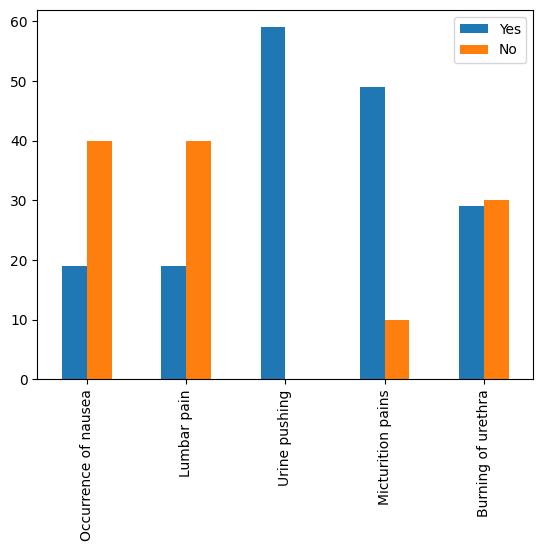

In [85]:
ax = myplot1.plot.bar()
plt.show()

In [86]:
Rules = list(apriori(Inflammation_of_urinary_bladder, min_support=0.4, min_confidence=0.95))
associationRules = utils.extract(Rules,'Urine pushing',2)
rules_df1 = pd.DataFrame(associationRules)
utils.inspect(associationRules)

The number of associated rules: 4
LHS: ['Burning of urethra'] --> RHS:['Urine pushing'], support: 0.49, confidence: 1.00, lift: 1.00
--------------------------------------------------------------------------------
LHS: ['Micturition pains'] --> RHS:['Urine pushing'], support: 0.83, confidence: 1.00, lift: 1.00
--------------------------------------------------------------------------------
LHS: ['Burning of urethra'] --> RHS:['Micturition pains', 'Urine pushing'], support: 0.49, confidence: 1.00, lift: 1.20
--------------------------------------------------------------------------------
LHS: ['Micturition pains', 'Burning of urethra'] --> RHS:['Urine pushing'], support: 0.49, confidence: 1.00, lift: 1.00
--------------------------------------------------------------------------------


In [87]:
import plotly.express as px

In [88]:
Rules = list(apriori(Inflammation_of_urinary_bladder, min_support=0.2, min_confidence=0.5))
associationRules = utils.extract(Rules)
rules_df1 = pd.DataFrame(associationRules, columns=['LHS', 'RHS', 'Support', 'Confidence', 'Lift'])

fig = px.scatter(rules_df1, x='Support', y='Confidence', color='Lift',
                 hover_data=['LHS', 'RHS'], color_continuous_scale='agsunset')
fig.show()

In [89]:
Rules = list(apriori(Inflammation_of_urinary_bladder, min_support=0.2, min_confidence=0.5, max_length=3))
associationRules = utils.extract(Rules)
rules_df1 = pd.DataFrame(associationRules, columns=['LHS', 'RHS', 'Support', 'Confidence', 'Lift'])

Micturition_pains_rules = rules_df1[rules_df1['RHS'].apply(lambda x: 'Micturition pains' in x)].sort_values(by=['Lift'], ascending=False)
Micturition_pains_rules.head()

,LHS,RHS,Support,Confidence,Lift
19,[Lumbar pain],"[Micturition pains, Occurrence of nausea]",0.322034,1.0,3.105263
20,[Occurrence of nausea],"[Micturition pains, Lumbar pain]",0.322034,1.0,3.105263
2,[Burning of urethra],[Micturition pains],0.491525,1.0,1.204082
5,[Lumbar pain],[Micturition pains],0.322034,1.0,1.204082
9,[Occurrence of nausea],[Micturition pains],0.322034,1.0,1.204082


In [90]:
fig = px.scatter(Micturition_pains_rules, x='Support', y='Confidence', color='Lift',
                 hover_data=['LHS', 'RHS'], color_continuous_scale='agsunset')
fig.show()

## Part B : Nephritis of renal pelvis origin

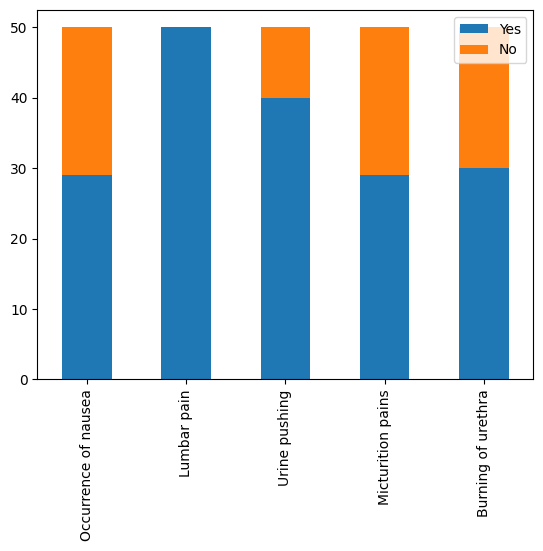

In [92]:
#Inflammation of urinary bladder
yes2 = (df2 == 'Yes').sum()
no2 = (df2 == 'No').sum()
myplot2 = pd.concat([yes2,no2], axis=1,keys=['Yes','No'])
ax=myplot2.plot.bar(stacked=True)
plt.show()

In [94]:
Nephritis_of_renal_pelvis_origin = utils.data_prepare(df2)
Nephritis_of_renal_pelvis_origin

[['Lumbar pain', 'Urine pushing', 'Burning of urethra'],
 ['Lumbar pain', 'Urine pushing', 'Burning of urethra'],
 ['Lumbar pain', 'Urine pushing', 'Burning of urethra'],
 ['Lumbar pain', 'Urine pushing', 'Burning of urethra'],
 ['Lumbar pain', 'Urine pushing', 'Burning of urethra'],
 ['Lumbar pain', 'Urine pushing', 'Burning of urethra'],
 ['Lumbar pain', 'Urine pushing', 'Burning of urethra'],
 ['Lumbar pain', 'Urine pushing', 'Burning of urethra'],
 ['Lumbar pain', 'Urine pushing', 'Burning of urethra'],
 ['Lumbar pain', 'Urine pushing', 'Burning of urethra'],
 ['Occurrence of nausea',
  'Lumbar pain',
  'Urine pushing',
  'Micturition pains',
  'Burning of urethra'],
 ['Occurrence of nausea',
  'Lumbar pain',
  'Urine pushing',
  'Micturition pains',
  'Burning of urethra'],
 ['Occurrence of nausea', 'Lumbar pain', 'Urine pushing', 'Micturition pains'],
 ['Occurrence of nausea', 'Lumbar pain', 'Micturition pains'],
 ['Occurrence of nausea', 'Lumbar pain', 'Micturition pains'],
 ['L

In [95]:
Rules_B = list(apriori(Nephritis_of_renal_pelvis_origin, min_support=0.2, min_confidence=0.5))

In [96]:
associationRules_B = utils.extract(Rules_B)
rules_df2 = pd.DataFrame(associationRules_B, columns=['LHS', 'RHS', 'Support', 'Confidence', 'Lift'])
len(rules_df2)

61

In [97]:
utils.inspect(associationRules_B)

The number of associated rules: 61
LHS: [] --> RHS:['Burning of urethra'], support: 0.60, confidence: 0.60, lift: 1.00
--------------------------------------------------------------------------------
LHS: [] --> RHS:['Lumbar pain'], support: 1.00, confidence: 1.00, lift: 1.00
--------------------------------------------------------------------------------
LHS: [] --> RHS:['Micturition pains'], support: 0.58, confidence: 0.58, lift: 1.00
--------------------------------------------------------------------------------
LHS: [] --> RHS:['Occurrence of nausea'], support: 0.58, confidence: 0.58, lift: 1.00
--------------------------------------------------------------------------------
LHS: [] --> RHS:['Urine pushing'], support: 0.80, confidence: 0.80, lift: 1.00
--------------------------------------------------------------------------------
LHS: [] --> RHS:['Burning of urethra', 'Lumbar pain'], support: 0.60, confidence: 0.60, lift: 1.00
----------------------------------------------------

In [100]:
rules_df2.nlargest(10, 'Lift')

,LHS,RHS,Support,Confidence,Lift
21,[Micturition pains],[Occurrence of nausea],0.58,1.000000,1.724138
22,[Occurrence of nausea],[Micturition pains],0.58,1.000000,1.724138
34,[Micturition pains],"[Lumbar pain, Occurrence of nausea]",0.58,1.000000,1.724138
35,[Occurrence of nausea],"[Micturition pains, Lumbar pain]",0.58,1.000000,1.724138
36,"[Micturition pains, Lumbar pain]",[Occurrence of nausea],0.58,1.000000,1.724138
37,"[Lumbar pain, Occurrence of nausea]",[Micturition pains],0.58,1.000000,1.724138
45,[Micturition pains],"[Occurrence of nausea, Urine pushing]",0.38,0.655172,1.724138
46,[Occurrence of nausea],"[Micturition pains, Urine pushing]",0.38,0.655172,1.724138
48,"[Micturition pains, Urine pushing]",[Occurrence of nausea],0.38,1.000000,1.724138
49,"[Occurrence of nausea, Urine pushing]",[Micturition pains],0.38,1.000000,1.724138


In [103]:
rules_df2.nlargest(10, 'Support')

,LHS,RHS,Support,Confidence,Lift
1,[],[Lumbar pain],1.0,1.0,1.0
4,[],[Urine pushing],0.8,0.8,1.0
17,[],"[Lumbar pain, Urine pushing]",0.8,0.8,1.0
18,[Lumbar pain],[Urine pushing],0.8,0.8,1.0
19,[Urine pushing],[Lumbar pain],0.8,1.0,1.0
0,[],[Burning of urethra],0.6,0.6,1.0
5,[],"[Burning of urethra, Lumbar pain]",0.6,0.6,1.0
6,[Burning of urethra],[Lumbar pain],0.6,1.0,1.0
7,[Lumbar pain],[Burning of urethra],0.6,0.6,1.0
8,[],"[Burning of urethra, Urine pushing]",0.6,0.6,1.0


In [102]:
rules_df2.nlargest(10, 'Confidence')

,LHS,RHS,Support,Confidence,Lift
1,[],[Lumbar pain],1.00,1.0,1.000000
6,[Burning of urethra],[Lumbar pain],0.60,1.0,1.000000
9,[Burning of urethra],[Urine pushing],0.60,1.0,1.250000
13,[Micturition pains],[Lumbar pain],0.58,1.0,1.000000
16,[Occurrence of nausea],[Lumbar pain],0.58,1.0,1.000000
19,[Urine pushing],[Lumbar pain],0.80,1.0,1.000000
21,[Micturition pains],[Occurrence of nausea],0.58,1.0,1.724138
22,[Occurrence of nausea],[Micturition pains],0.58,1.0,1.724138
26,[Burning of urethra],"[Lumbar pain, Urine pushing]",0.60,1.0,1.250000
29,"[Burning of urethra, Lumbar pain]",[Urine pushing],0.60,1.0,1.250000


In [104]:
rules_df2[rules_df2['LHS'].apply(lambda x: len(x) > 0)].nlargest(10,'Support')

,LHS,RHS,Support,Confidence,Lift
18,[Lumbar pain],[Urine pushing],0.8,0.80,1.00
19,[Urine pushing],[Lumbar pain],0.8,1.00,1.00
6,[Burning of urethra],[Lumbar pain],0.6,1.00,1.00
7,[Lumbar pain],[Burning of urethra],0.6,0.60,1.00
9,[Burning of urethra],[Urine pushing],0.6,1.00,1.25
10,[Urine pushing],[Burning of urethra],0.6,0.75,1.25
26,[Burning of urethra],"[Lumbar pain, Urine pushing]",0.6,1.00,1.25
27,[Lumbar pain],"[Burning of urethra, Urine pushing]",0.6,0.60,1.00
28,[Urine pushing],"[Burning of urethra, Lumbar pain]",0.6,0.75,1.25
29,"[Burning of urethra, Lumbar pain]",[Urine pushing],0.6,1.00,1.25


In [105]:
Rules_B = list(apriori(Nephritis_of_renal_pelvis_origin, min_support=0.2, min_confidence=0.5, max_length=3))
associationRules_B = utils.extract(Rules_B)
rules_df2 = pd.DataFrame(associationRules_B, columns=['LHS', 'RHS', 'Support', 'Confidence', 'Lift'])
len(rules_df2)

50

In [106]:
rules_df2.nlargest(10, "Lift")

,LHS,RHS,Support,Confidence,Lift
21,[Micturition pains],[Occurrence of nausea],0.58,1.000000,1.724138
22,[Occurrence of nausea],[Micturition pains],0.58,1.000000,1.724138
34,[Micturition pains],"[Lumbar pain, Occurrence of nausea]",0.58,1.000000,1.724138
35,[Occurrence of nausea],"[Micturition pains, Lumbar pain]",0.58,1.000000,1.724138
36,"[Micturition pains, Lumbar pain]",[Occurrence of nausea],0.58,1.000000,1.724138
37,"[Lumbar pain, Occurrence of nausea]",[Micturition pains],0.58,1.000000,1.724138
45,[Micturition pains],"[Occurrence of nausea, Urine pushing]",0.38,0.655172,1.724138
46,[Occurrence of nausea],"[Micturition pains, Urine pushing]",0.38,0.655172,1.724138
48,"[Micturition pains, Urine pushing]",[Occurrence of nausea],0.38,1.000000,1.724138
49,"[Occurrence of nausea, Urine pushing]",[Micturition pains],0.38,1.000000,1.724138


In [107]:
rules_df2.nlargest(10, "Support")

,LHS,RHS,Support,Confidence,Lift
1,[],[Lumbar pain],1.0,1.0,1.0
4,[],[Urine pushing],0.8,0.8,1.0
17,[],"[Lumbar pain, Urine pushing]",0.8,0.8,1.0
18,[Lumbar pain],[Urine pushing],0.8,0.8,1.0
19,[Urine pushing],[Lumbar pain],0.8,1.0,1.0
0,[],[Burning of urethra],0.6,0.6,1.0
5,[],"[Burning of urethra, Lumbar pain]",0.6,0.6,1.0
6,[Burning of urethra],[Lumbar pain],0.6,1.0,1.0
7,[Lumbar pain],[Burning of urethra],0.6,0.6,1.0
8,[],"[Burning of urethra, Urine pushing]",0.6,0.6,1.0


In [108]:
rules_df2.nlargest(10, "Confidence")

,LHS,RHS,Support,Confidence,Lift
1,[],[Lumbar pain],1.00,1.0,1.000000
6,[Burning of urethra],[Lumbar pain],0.60,1.0,1.000000
9,[Burning of urethra],[Urine pushing],0.60,1.0,1.250000
13,[Micturition pains],[Lumbar pain],0.58,1.0,1.000000
16,[Occurrence of nausea],[Lumbar pain],0.58,1.0,1.000000
19,[Urine pushing],[Lumbar pain],0.80,1.0,1.000000
21,[Micturition pains],[Occurrence of nausea],0.58,1.0,1.724138
22,[Occurrence of nausea],[Micturition pains],0.58,1.0,1.724138
26,[Burning of urethra],"[Lumbar pain, Urine pushing]",0.60,1.0,1.250000
29,"[Burning of urethra, Lumbar pain]",[Urine pushing],0.60,1.0,1.250000


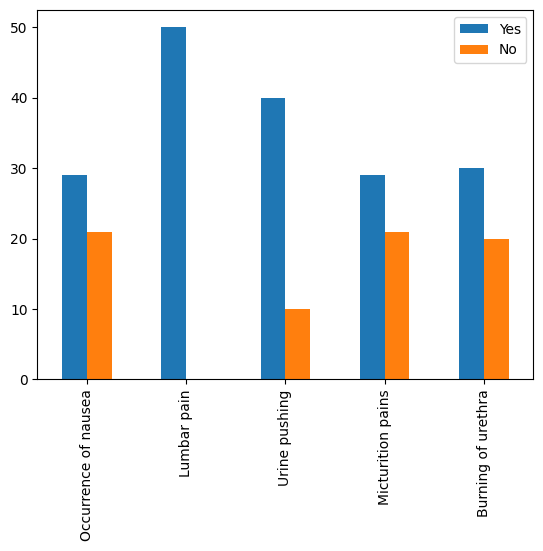

In [109]:
ax = myplot2.plot.bar()
plt.show()

In [110]:
Rules_B = list(apriori(Nephritis_of_renal_pelvis_origin, min_support=0.4, min_confidence=0.95))
associationRules_B = utils.extract(Rules_B,'Lumbar pain',2)
rules_df2 = pd.DataFrame(associationRules_B)
utils.inspect(associationRules_B)

The number of associated rules: 9
LHS: ['Burning of urethra'] --> RHS:['Lumbar pain'], support: 0.60, confidence: 1.00, lift: 1.00
--------------------------------------------------------------------------------
LHS: ['Micturition pains'] --> RHS:['Lumbar pain'], support: 0.58, confidence: 1.00, lift: 1.00
--------------------------------------------------------------------------------
LHS: ['Occurrence of nausea'] --> RHS:['Lumbar pain'], support: 0.58, confidence: 1.00, lift: 1.00
--------------------------------------------------------------------------------
LHS: ['Urine pushing'] --> RHS:['Lumbar pain'], support: 0.80, confidence: 1.00, lift: 1.00
--------------------------------------------------------------------------------
LHS: ['Burning of urethra'] --> RHS:['Lumbar pain', 'Urine pushing'], support: 0.60, confidence: 1.00, lift: 1.25
--------------------------------------------------------------------------------
LHS: ['Burning of urethra', 'Urine pushing'] --> RHS:['Lumbar p

In [111]:
Rules_B = list(apriori(Nephritis_of_renal_pelvis_origin, min_support=0.2, min_confidence=0.5))
associationRules_B = utils.extract(Rules_B)
rules_df2 = pd.DataFrame(associationRules_B, columns=['LHS', 'RHS', 'Support', 'Confidence', 'Lift'])

fig = px.scatter(rules_df2, x='Support', y='Confidence', color='Lift',
                 hover_data=['LHS', 'RHS'], color_continuous_scale='agsunset')
fig.show()

In [112]:
Rules_B = list(apriori(Nephritis_of_renal_pelvis_origin, min_support=0.2, min_confidence=0.5, max_length=3))
associationRules_B = utils.extract(Rules_B)
rules_df2 = pd.DataFrame(associationRules_B, columns=['LHS', 'RHS', 'Support', 'Confidence', 'Lift'])

Micturition_pains_rules_B = rules_df2[rules_df2['RHS'].apply(lambda x: 'Micturition pains' in x)].sort_values(by=['Lift'], ascending=False)
Micturition_pains_rules_B.head()

,LHS,RHS,Support,Confidence,Lift
22,[Occurrence of nausea],[Micturition pains],0.58,1.000000,1.724138
35,[Occurrence of nausea],"[Micturition pains, Lumbar pain]",0.58,1.000000,1.724138
37,"[Lumbar pain, Occurrence of nausea]",[Micturition pains],0.58,1.000000,1.724138
46,[Occurrence of nausea],"[Micturition pains, Urine pushing]",0.38,0.655172,1.724138
49,"[Occurrence of nausea, Urine pushing]",[Micturition pains],0.38,1.000000,1.724138


In [113]:
fig = px.scatter(Micturition_pains_rules_B, x='Support', y='Confidence', color='Lift',
                 hover_data=['LHS', 'RHS'], color_continuous_scale='agsunset')
fig.show()